In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

import ml_modules as mm

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from mlxtend.classifier import StackingClassifier
from scipy import interp

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
from skater.model import InMemoryModel
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import lightgbm as lgb
import xgboost as xgb

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [7]:
df_train_data = pd.read_csv('wine_train.csv')
df_train_data = pd.get_dummies(df_train_data)

In [8]:
bins = [0,5,7,10]
labels = [0,1,2]

df_train_data['quality_range']=pd.cut(x=df_train_data['quality'], bins=bins, labels=labels)

In [9]:
details = mm.rstr(df_train_data, 'quality')
details

Data shape: (5497, 15)
___________________________
Data types:
 float64    4
int64      3
object     2
dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr quality
fixed.acidity,float64,5497,104,0,0.0,"[5.8, 5.4, 7.4, 7.0, 7.9, 6.1, 5.6, 6.2, 11.9,...",1.732083,5.146521,-0.077304
volatile.acidity,float64,5497,181,0,0.0,"[0.18, 0.835, 0.61, 0.31, 0.35, 0.15, 0.66, 0....",1.480543,2.825178,-0.266449
citric.acid,float64,5497,87,0,0.0,"[0.37, 0.08, 0.01, 0.26, 0.36, 0.29, 0.0, 0.48...",0.355286,1.379355,0.080977
residual.sugar,float64,5497,303,0,0.0,"[1.1, 1.2, 2.0, 7.4, 1.6, 6.2, 2.5, 2.8, 6.9, ...",1.486139,5.006813,-0.041976
chlorides,float64,5497,204,0,0.0,"[0.036000000000000004, 0.046, 0.07400000000000...",5.637169,54.706018,-0.200778
free.sulfur.dioxide,float64,5497,128,0,0.0,"[31.0, 13.0, 28.0, 11.0, 39.0, 7.0, 29.0, 6.0,...",1.298491,9.065928,0.056353
total.sulfur.dioxide,float64,5497,275,0,0.0,"[96.0, 93.0, 38.0, 160.0, 124.0, 151.0, 15.0, ...",0.023181,-0.327189,-0.037969
density,float64,5497,964,0,0.0,"[0.9894200000000001, 0.9924, 0.997479999999999...",0.589583,7.615904,-0.313193
pH,float64,5497,108,0,0.0,"[3.16, 3.57, 3.48, 3.13, 3.25, 3.6, 3.52, 3.33...",0.396733,0.416000,0.009871
sulphates,float64,5497,109,0,0.0,"[0.48, 0.85, 0.65, 0.46, 0.44, 0.58, 0.39, 0.5...",1.881176,9.585108,0.032083


In [10]:
x = df_train_data[list(set(df_train_data.columns)-set(['type_W','type_R','quality','quality_range']))]
# y = df_train_data['quality_range']
y = df_train_data['quality']

ss = StandardScaler()
scaled_x = pd.DataFrame(columns=x.columns,data=ss.fit_transform(x))

In [11]:
X_train, X_test, y_train, y_test \
= train_test_split(scaled_x, y, test_size=0.2, random_state=1)

In [ ]:
clf = Pipeline([
        ('clf', LogisticRegression(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [10, 12]
whiten = [True] #, False]
C =  [0.003, 0.009, 0.01]#, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol = [0.001, 0.0001] # [1e-06, 5e-07, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]

param_grid =\
    [{'clf__C': C
     ,'clf__solver': ['liblinear', 'saga'] 
     ,'clf__penalty': ['l1', 'l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced']
},
    {'clf__C': C
     ,'clf__max_iter': [3, 9, 2, 7, 4]
     ,'clf__solver': ['newton-cg', 'sag', 'lbfgs']
     ,'clf__penalty': ['l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced'] 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
LR = Pipeline([
        #('sel', select_fetaures(select_cols=list(shadow))),
        ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ]) 

In [ ]:
LR.fit(X_train,y_train)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 1140 out of 1140 | elapsed:   33.6s finished
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         LogisticRegression(C=1.0,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                    

Model Performance metrics:
------------------------------
Accuracy:  51.82% 
Precision: 49.24% 
Recall:    51.82% 
F1 Score:  45.17% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        38
           7       0.57      0.60      0.58       351
           4       0.49      0.75      0.59       473
           8       0.55      0.03      0.06       200
           3       0.00      0.00      0.00        32

    accuracy                           0.52      1100
   macro avg       0.27      0.23      0.21      1100
weighted avg       0.49      0.52      0.45      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                   
                   5  6    7    4  8  3
Actual: 5          0  0    1    5  0  0
        6          0  0   25   13  0  0
        7          0  0  210  140  1  0
 

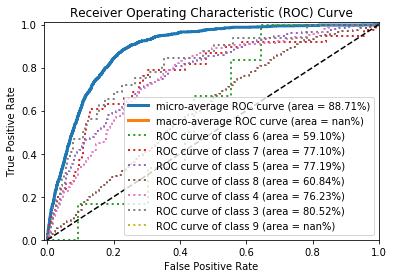

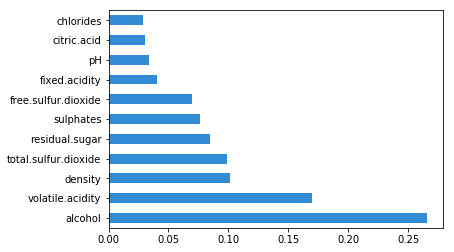

In [ ]:
results = mm.get_results(LR,'LogisticRegression', X_test, y_test, gs,[str(x) for x in y.unique()], results=results, reasume=False)

In [ ]:
results

,Prob,CV Accuracy,Accuracy,ROC AUC Score,ROC Area
LinearSVC,True,0.539914,0.5182,0.597621,NaN
RF,True,0.658176,0.6455,0.716554,NaN
KNeighborsClassifier,True,0.632249,0.6364,0.714642,NaN
LogisticRegression,True,0.540823,0.5182,0.599071,NaN


In [ ]:
clf = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11] # [15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None] 

param_grid =\
    [{ 'clf__class_weight': class_weight
      ,'clf__criterion': criterion
      ,'clf__splitter': splitter
      ,'clf__max_depth': max_depth
      ,'clf__min_samples_leaf': min_samples_leaf
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
DT = Pipeline([
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [ ]:
DT.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.3s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                            

Model Performance metrics:
------------------------------
Accuracy:  54.18% 
Precision: 53.06% 
Recall:    54.18% 
F1 Score:  53.06% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.20      0.17      0.18         6
           6       0.12      0.05      0.07        38
           7       0.59      0.60      0.60       351
           4       0.54      0.63      0.58       473
           8       0.51      0.40      0.45       200
           3       0.45      0.16      0.23        32

    accuracy                           0.54      1100
   macro avg       0.40      0.33      0.35      1100
weighted avg       0.53      0.54      0.53      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                    
                   5  6    7    4   8  3
Actual: 5          1  1    2    1   1  0
        6          0  2   22   13   1  0
        7          3  7  211  121   9

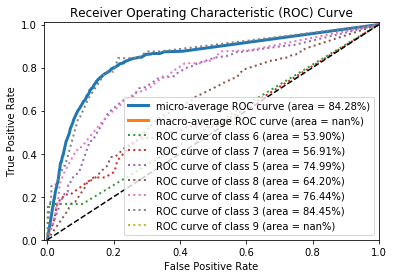

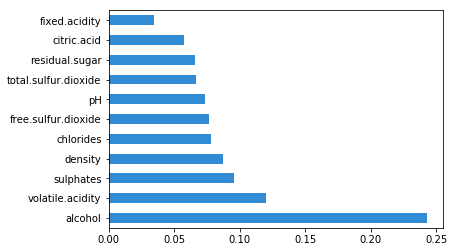

In [ ]:
results = mm.get_results(DT, 'DT First', X_test, y_test, gs, [str(x) for x in y.unique()], results=results, reasume=False)

In [47]:
results

,Prob,CV Accuracy,Accuracy,ROC AUC Score,ROC Area
GradientBoostingClassifier,True,0.638617,0.6455,0.720014,NaN
AdaBoostClassifier,True,0.229702,0.2736,0.530701,NaN


In [15]:
clf = Pipeline([('clf', SVC(random_state=101, kernel='linear', probability=True))])   

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [10, 12]
whiten = [True] #, False]
C =  [0.003, 0.009, 0.01]#, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol = [0.001, 0.0001] # [1e-06, 5e-07, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
gamma = ['scale', 'auto']


param_grid =\
    [{'clf__C': C
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced']
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
svc = Pipeline([
        #('sel', select_fetaures(select_cols=list(shadow))),
        ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ]) 

In [16]:
svc.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   51.1s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         SVC(C=1.0,
                                                             cache_size=200,
                                                             class_weight=None,
                                                             coef0=0.0,
                                                             decision_function_shape='ovr',
                                                             degree=3,
                                                             gamma='auto_deprecated',
                                                             kernel='linear',
                                    

Model Performance metrics:
------------------------------
Accuracy:  51.82% 
Precision: 39.38% 
Recall:    51.82% 
F1 Score:  44.32% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        38
           7       0.57      0.59      0.58       351
           4       0.49      0.77      0.60       473
           8       0.00      0.00      0.00       200
           3       0.00      0.00      0.00        32

    accuracy                           0.52      1100
   macro avg       0.18      0.23      0.20      1100
weighted avg       0.39      0.52      0.44      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                   
                   5  6    7    4  8  3
Actual: 5          0  0    1    5  0  0
        6          0  0   26   12  0  0
        7          0  0  208  143  0  0
 

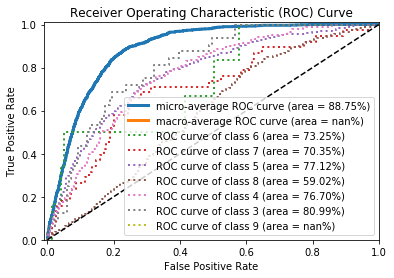

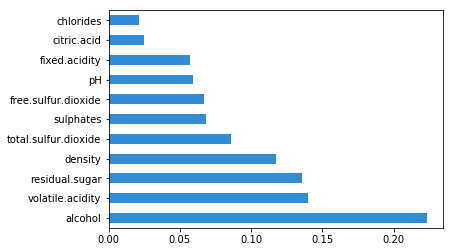

In [17]:
results = mm.get_results(svc,'LinearSVC', X_test, y_test, gs, [str(x) for x in y.unique()], results=results, reasume=False)

In [18]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', RandomForestClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = X_train.columns
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
criterion = ['gini', 'entropy']
class_weight = ['balanced', None] 
n_estimators = [155, 175]  
max_depth  = [20, None] #, 3, 4, 5, 10] # 
min_samples_split = [2, 3, 4]
min_samples_leaf = [1] #, 2 , 3]

param_grid =\
    [{ #'clf__class_weight': class_weight
      'clf__criterion': criterion
      ,'clf__n_estimators': n_estimators      
      ,'clf__min_samples_split': min_samples_split
      ,'clf__max_depth': max_depth
      #,'clf__min_samples_leaf': min_samples_leaf
      #,'pca__n_components' : n_components
      #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
RF = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [19]:
RF.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         RandomForestClassifier(bootstrap=True,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                     

Model Performance metrics:
------------------------------
Accuracy:  64.55% 
Precision: 65.70% 
Recall:    64.55% 
F1 Score:  63.18% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.80      0.11      0.19        38
           7       0.67      0.71      0.69       351
           4       0.61      0.74      0.67       473
           8       0.67      0.48      0.56       200
           3       1.00      0.34      0.51        32

    accuracy                           0.65      1100
   macro avg       0.63      0.40      0.44      1100
weighted avg       0.66      0.65      0.63      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                     
                   5  6    7    4   8   3
Actual: 5          0  0    2    3   1   0
        6          0  4   23   11   0   0
        7          0  1  250   95

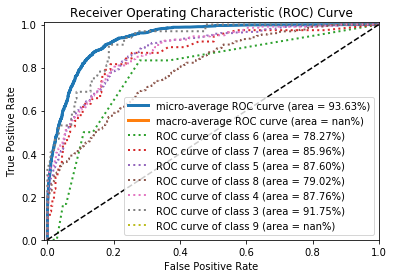

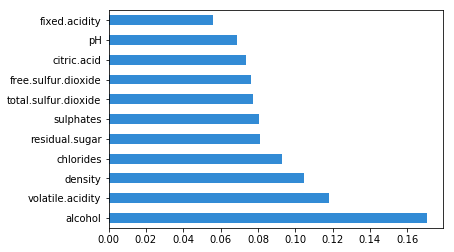

In [20]:
results = mm.get_results(RF, 'RF', X_test, y_test, gs, [str(x) for x in y.unique()], results=results, reasume=False)

In [21]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', KNeighborsClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]

param_grid =\
    [{'clf__n_neighbors': [10, 11, 12, 13] 
     ,'clf__weights': ['distance'] 
     ,'clf__algorithm' : ['ball_tree'] #, 'brute', 'auto',  'kd_tree', 'brute']
     ,'clf__leaf_size': [12, 11, 13]
     ,'clf__p': [1] 
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

KNNC = Pipeline([
#         ('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [22]:
KNNC.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         KNeighborsClassifier(algorithm='auto',
                                                                              leaf_size=30,
                                                                              metric='minkowski',
                                                                              metric_params=None,
                                                                              n_jobs=None,
                                                                              n_neighbors=5,
                                                                              p=2,
         

Model Performance metrics:
------------------------------
Accuracy:  63.64% 
Precision: 64.54% 
Recall:    63.64% 
F1 Score:  62.38% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       1.00      0.08      0.15        38
           7       0.66      0.71      0.69       351
           4       0.62      0.70      0.66       473
           8       0.62      0.53      0.57       200
           3       0.71      0.38      0.49        32

    accuracy                           0.64      1100
   macro avg       0.60      0.40      0.42      1100
weighted avg       0.65      0.64      0.62      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   5  6    7    4    8   3
Actual: 5          0  0    0    5    1   0
        6          0  3   23   11    1   0
        7          0  0  250 

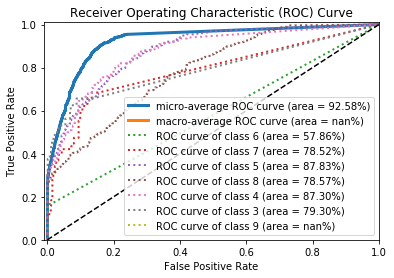

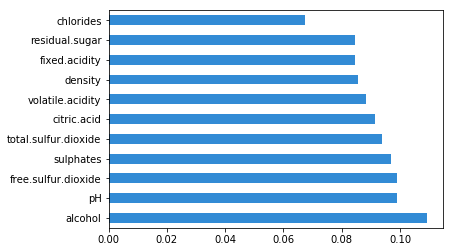

In [23]:
results = mm.get_results(KNNC, 'KNeighborsClassifier', X_test, y_test, gs, [str(x) for x in y.unique()],
                      results=results, reasume=False)

In [32]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', lgb.LGBMClassifier(objective='multiclass',
                        num_leaves = 31,
                        learning_rate=0.1,
                        min_child_samples=10,
                        n_estimators=100))])  

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = X_train.columns
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
criterion = ['gini', 'entropy']
class_weight = ['balanced', None] 
n_estimators = [155, 175]  
max_depth  = [20, None] #, 3, 4, 5, 10] # 
min_samples_split = [2, 3, 4]
min_samples_leaf = [1] #, 2 , 3]

param_grid =\
    [{ #'clf__class_weight': class_weight
      'clf__criterion': criterion
      ,'clf__n_estimators': n_estimators      
      ,'clf__min_samples_split': min_samples_split
      ,'clf__max_depth': max_depth
      #,'clf__min_samples_leaf': min_samples_leaf
      #,'pca__n_components' : n_components
      #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
GBM = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [33]:
GBM.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.7min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         LGBMClassifier(boosting_type='gbdt',
                                                                        class_weight=None,
                                                                        colsample_bytree=1.0,
                                                                        importance_type='split',
                                                                        learning_rate=0.1,
                                                                        max_depth=-1,
                                                                        min_child_samples=10,
             

Model Performance metrics:
------------------------------
Accuracy:  62.09% 
Precision: 61.92% 
Recall:    62.09% 
F1 Score:  60.77% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.50      0.11      0.17        38
           7       0.65      0.69      0.67       351
           4       0.60      0.71      0.65       473
           8       0.64      0.45      0.52       200
           3       0.79      0.34      0.48        32

    accuracy                           0.62      1100
   macro avg       0.53      0.38      0.42      1100
weighted avg       0.62      0.62      0.61      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                     
                   5  6    7    4   8   3
Actual: 5          0  0    3    3   0   0
        6          0  4   25    9   0   0
        7          0  2  243  101

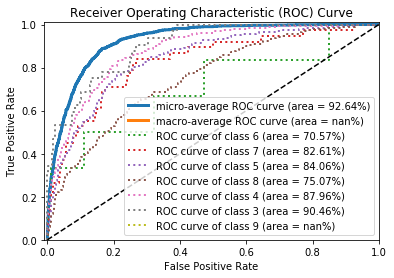

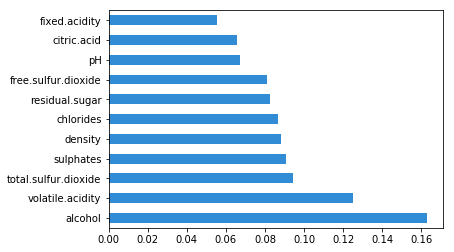

In [34]:
results = mm.get_results(GBM, 'LGBM', X_test, y_test, gs, [str(x) for x in y.unique()],  results=results, reasume=False)

In [35]:
clf = Pipeline([
        ('clf', xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, n_jobs=1,
                       colsample_bytree=1, gamma=0.0001, max_delta_step=0, random_state=101, 
                       silent=True, subsample=1))])
n_est = [112] #112
max_depth = [15] 
learning_rate = [0.1] 
reg_lambda = [0.7] 
reg_alpha= [0.05]
booster = ['gbtree'] #  'dart'] #,'gblinear',
objective = ['multi:softmax'] #, 'multi:softprob']

param_grid =\
    [{ 
      'clf__n_estimators': n_est
      ,'clf__booster': booster
      ,'clf__objective': objective
      ,'clf__learning_rate': learning_rate
      ,'clf__reg_lambda': reg_lambda
      ,'clf__reg_alpha': reg_alpha
      ,'clf__max_depth': max_depth
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3,
                  verbose=1, n_jobs=3)

XGBC = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [36]:
XGBC.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.6s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=3, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         XGBClassifier(base_score=0.5,
                                                                       booster='gbtree',
                                                                       colsample_bylevel=1,
                                                                       colsample_bytree=1,
                                                                       gamma=0.0001,
                                                                       learning_rate=0.1,
                                                                       max_delta_step=0,
                                     

Model Performance metrics:
------------------------------
Accuracy:  64.45% 
Precision: 64.09% 
Recall:    64.45% 
F1 Score:  63.42% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.50      0.17      0.25         6
           6       0.50      0.13      0.21        38
           7       0.68      0.72      0.70       351
           4       0.62      0.72      0.67       473
           8       0.64      0.51      0.56       200
           3       0.65      0.34      0.45        32

    accuracy                           0.64      1100
   macro avg       0.60      0.43      0.47      1100
weighted avg       0.64      0.64      0.63      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   5  6    7    4    8   3
Actual: 5          1  1    2    1    1   0
        6          0  5   25    8    0   0
        7          0  3  251 

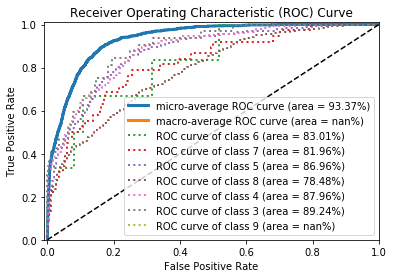

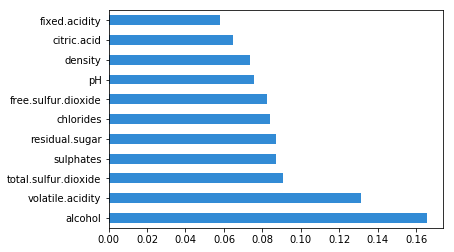

In [37]:
results = mm.get_results(XGBC, 'XGBC', X_test, y_test, gs, [str(x) for x in y.unique()], results=results,reasume=False)

In [38]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', GradientBoostingClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
#cv=None, dual=False,  scoring=None, refit=True,  multi_class='ovr'
SEL = X_train.columns
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
learning_rate =  [1e-02] #, 5e-03, 2e-02]
n_estimators= [400]
max_depth = [10]
n_comp = [2, 3, 4, 5]

param_grid =\
    [{'clf__learning_rate': learning_rate
     ,'clf__max_depth': max_depth
     ,'clf__n_estimators' : n_estimators 
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

GBC = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ])  

In [39]:
GBC.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         GradientBoostingClassifier(criterion='friedman_mse',
                                                                                    init=None,
                                                                                    learning_rate=0.1,
                                                                                    loss='deviance',
                                                                                    max_depth=3,
                                                                                    max_features=None,
                                                   

Model Performance metrics:
------------------------------
Accuracy:  64.55% 
Precision: 64.26% 
Recall:    64.55% 
F1 Score:  63.42% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.50      0.17      0.25         6
           7       0.31      0.13      0.19        38
           5       0.70      0.68      0.69       351
           8       0.62      0.77      0.69       473
           4       0.65      0.46      0.54       200
           3       0.69      0.34      0.46        32
           9       0.00      0.00      0.00         0

    accuracy                           0.65      1100
   macro avg       0.50      0.36      0.40      1100
weighted avg       0.64      0.65      0.63      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   6  7    5    8   4   3  9
Actual: 6          1  0    2    2   1   0  0
        7   

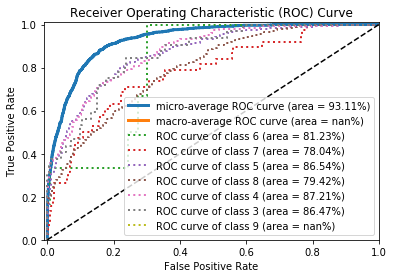

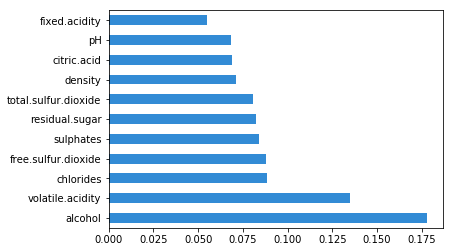

In [40]:
results = mm.get_results(GBC, 'GradientBoostingClassifier', X_test, y_test, gs, [str(x) for x in y.unique()]
                      , reasume=True)

In [41]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', AdaBoostClassifier(random_state=101))])

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
n_comp = [2, 3, 4, 5]

param_grid =\
    [{'clf__learning_rate': [2e-01, 15e-02]
     ,'clf__n_estimators': [500, 600, 700] 
     ,'clf__algorithm' : ['SAMME.R'] # 'SAMME'
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     #,'lda__n_components': n_comp
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

ADAB = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ])  

In [42]:
ADAB.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.5s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         AdaBoostClassifier(algorithm='SAMME.R',
                                                                            base_estimator=None,
                                                                            learning_rate=1.0,
                                                                            n_estimators=50,
                                                                            random_state=101))],
                                                 verbose=False),
                              iid='warn', n_jobs=-1,
                              param_grid=[{'clf__algorithm': ['

Model Performance metrics:
------------------------------
Accuracy:  27.36% 
Precision: 38.60% 
Recall:    27.36% 
F1 Score:  28.90% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.04      0.45      0.08        38
           7       0.35      0.07      0.12       351
           4       0.48      0.47      0.47       473
           8       0.37      0.19      0.25       200
           3       0.00      0.00      0.00        32

    accuracy                           0.27      1100
   macro avg       0.21      0.20      0.15      1100
weighted avg       0.39      0.27      0.29      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                     
                   5    6   7    4   8  3
Actual: 5          0    4   1    1   0  0
        6          3   17   1   16   1  0
        7         32  196  25   9

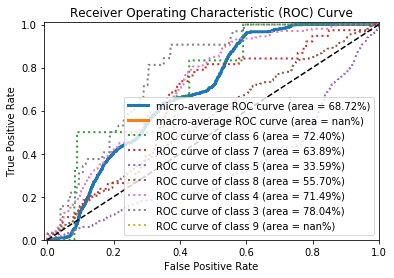

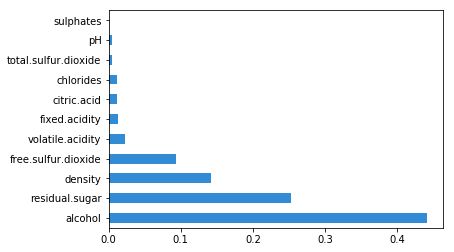

In [43]:
results = mm.get_results(ADAB, 'AdaBoostClassifier', X_test, y_test, gs, [str(x) for x in y.unique()]
                      , results=results, reasume=False)

In [ ]:
corr = X.corr()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True, cbar=True, cmap='coolwarm', square=True, fmt='.2f', ax=ax)

In [ ]:
model = smf.OLS(y, X)
result = model.fit()

## 重回帰分析の結果から特徴量を選定する
- Adj. R-squared：自由度調整済み決定係数  
回帰式全体の精度,説明力,説明変数が増えると、決定係数(R-squared)は大きくなる.(目標は**0.85**くらい)
- t：各説明変数ごとの統計量  
絶対値が大きければ大きいほど、目的変数に与える影響が大きい.  
constというカラム名は、X = sm.add_constant(x)で生成した『y切片』のことなので、無視
- p>|t|：各説明変数ごとのp値  
0に近づけば近づくほど統計的な意味があり、逆に0.05よりも大きい値であればたまたまである可能性が高い.その説明変数は採用しないほうが良い.

In [ ]:
result.summary()

In [ ]:
X.drop('chlorides', axis=1, inplace=True)

In [ ]:
model = smf.OLS(y, X)
result = model.fit()

In [ ]:
result.summary()

In [ ]:
X.drop('citric.acid', axis=1, inplace=True)

In [ ]:
model = smf.OLS(y, X)
result = model.fit()

In [ ]:
result.summary()

In [ ]:
X_train.drop('chlorides', axis=1, inplace=True)
X_test.drop('chlorides', axis=1, inplace=True)

In [ ]:
sclf = StackingClassifier(classifiers=[RF, XGBC, GBM], # , XGBC
                          use_probas=False,
                          average_probas=False,
                          use_features_in_secondary=False,
                          meta_classifier= RF)

sclf.fit(X=X_train,y=y_train)

In [ ]:
results = mm.get_results(sclf, 'sclf', X_test, y_test,[str(x) for x in y.unique()], results=results, reasume=False)

In [34]:
wtp_ss = StandardScaler().fit(X_train)

# Scale the train set
X_train_Ss = wtp_ss.transform(X_train)

# Scale the test set
X_test_Ss = wtp_ss.transform(X_test)

wtp_dnn_model = Sequential()
wtp_dnn_model.add(Dense(64, activation='relu', input_shape=(11,)))
wtp_dnn_model.add(Dense(32, activation='relu'))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(3, activation='softmax'))

wtp_dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
epochs=40
history = wtp_dnn_model.fit(X_train_Ss, y_train, epochs=epochs, batch_size=50, 
                            shuffle=True, validation_split=0.2, verbose=0)

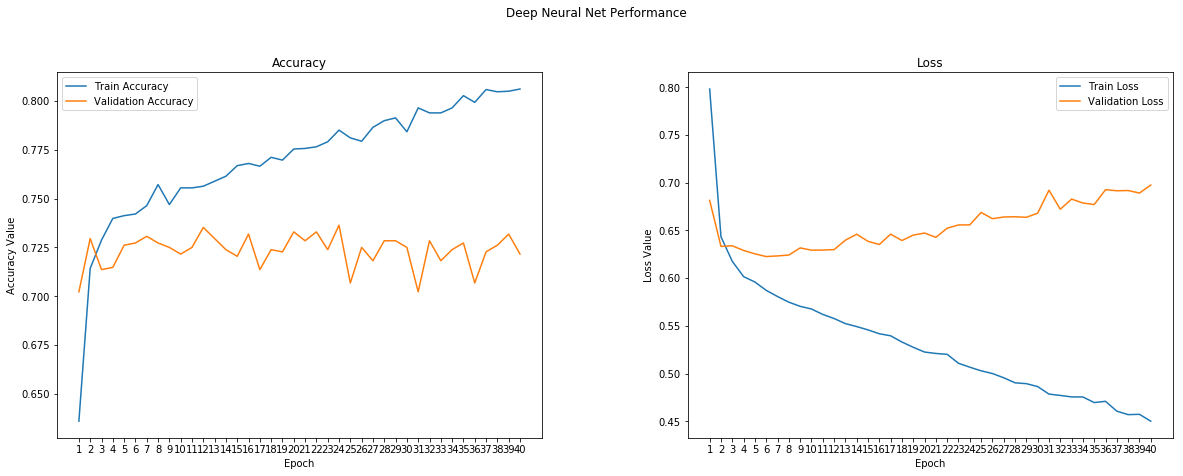

In [35]:
class_tp = LabelEncoder()
class_tp.fit_transform(df_train_data.quality_range.values)
wtp_dnn_ypred = wtp_dnn_model.predict_classes(X_test_Ss)
wtp_dnn_predictions = class_tp.inverse_transform(wtp_dnn_ypred) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,epochs+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Model Performance metrics:
------------------------------
Accuracy:  73.36% 
Precision: 72.89% 
Recall:    73.36% 
F1 Score:  72.50% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.66      0.70      0.68       395
      medium       0.78      0.79      0.78       673
        high       0.50      0.03      0.06        32

    accuracy                           0.73      1100
   macro avg       0.65      0.51      0.51      1100
weighted avg       0.73      0.73      0.72      1100


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           277    117    1
        medium        144    529    0
        high            0     31    1

ROC AUC Score by Classes:
 {'low': 0.7485, 'medium': 0.7197, 'high': 0.5152}
------------------------------------------------------------


              ROC AUC Score: 72.

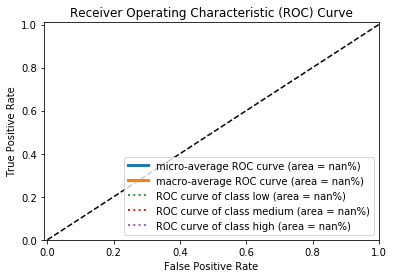

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [17]:
results = mm.get_results(wtp_dnn_model, 'DNN Regressor', X_test_Ss, y_test,
                        reasume=True)

In [44]:
estimators = [
    ('GBC', GBC),
    ('rf', RF),
    ('knn', KNNC),
    ('gbm', GBM),
    ('xgb', XGBC),
    ('lr', LR),
    ('adab', ADAB),
    ('svc', svc)
    ]

In [45]:
voting = VotingClassifier(estimators,weights=[2, 1.5, 1.5, 1, 1, 0.5, 0.5, 0.5], voting='soft')
voting.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 34.4min finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 41.5min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished


Fitting 5 folds for each of 228 candidates, totalling 1140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 731 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 1133 out of 1140 | elapsed:   31.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1140 out of 1140 | elapsed:   31.3s finished
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 97.2min finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 38.2min finished


VotingClassifier(estimators=[('GBC',
                              Pipeline(memory=None,
                                       steps=[('scl',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('gs',
                                               GridSearchCV(cv=5,
                                                            error_score='raise-deprecating',
                                                            estimator=Pipeline(memory=None,
                                                                               steps=[('clf',
                                                                                       GradientBoostingClassifier(criterion='friedman_mse',
                                                                                         

In [50]:
filename = 'voting_model.sav'
pickle.dump(voting, open(filename, 'wb'))

In [46]:
results = mm.get_results(voting, 'voting1', X_test, y_test, [str(x) for x in y.unique()], results=results, reasume=False)

AttributeError: 'list' object has no attribute 'best_params_'

In [ ]:
results